**First import all necessary packages for the activities.**

**We will be using BeautifulSoup to scrape the website, requests package to get the website data and pandas for creating dataframes.**
**various mapping and machine learning packages are also imported

In [408]:
!pip install bs4
!pip install geocoder
!pip install geopy
import geocoder
from bs4 import BeautifulSoup 
from sklearn.cluster import KMeans
import requests  
import pandas as pd
import folium
import json
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as colors
from pandas import json_normalize

First find outside info of where current Kava Bars are located

In [409]:
url='https://kavaguides.com/kava-bars'

In [410]:
data  = requests.get(url).text 
soup = BeautifulSoup(data, 'html5lib')

In [411]:
clean_row =[]
table=soup.find('table')
header =  table.find_all('th')
header_text = [h.text for h in header]
rows = table.find_all('tr')
 # display tables
for i in rows:
    table_data = i.find_all('td')
    if table_data:
        data = [j.text for j in table_data]
        clean_row.append(data)
df=pd.DataFrame(clean_row)
df.columns = header_text
df.head()

,Name,State,City
0,CBD American Shaman + Kava Bar,Arkansas,Fayetteville
1,MeloMelo Kava Bar,California,Berkeley
2,Root of Happiness Davis,California,Davis
3,Wu Wei Tea Temple,California,Fairfax
4,Elixart,California,Nevada City


In [412]:
print('The dataframe has {} States and {} Cities.'.format(
        len(df['State'].unique()),
        len(df['City'].unique())
    )
)

The dataframe has 14 States and 73 Cities.


In [305]:
states=df['State'].unique()
states

array(['Arkansas', 'California', 'Colorado', 'Florida', 'Hawaii',
       'Illinois', 'Kansas', 'Louisiana', 'Pennsylvania', 'Michigan',
       'Missouri', 'Montana', 'New Mexico', 'New York'], dtype=object)

In [306]:
city=df['City'].unique()
city

array(['Fayetteville', 'Berkeley', 'Davis', 'Fairfax', 'Nevada City',
       'Rancho Cordova', 'Roseville', 'Sacramento', 'San Bruno',
       'San Diego', 'San Francisco', 'San Rafael', 'Santa Cruz',
       '\xa0Denver', 'Colorado Springs', 'Denver', 'Largo',
       'Pompano Beach', 'Boca Raton', 'Bonita Springs', 'Boynton Beach',
       'Clearwater', 'Cocoa Beach', 'Cutler Bay', 'Delray Beach',
       'Fort Lauderdale', 'Fort Meyers', 'Fort Myers', 'Ft. Lauderdale',
       'Gainesville', 'Gulfport', 'Hollywood', 'Kissimmee', 'Lake Worth',
       'Madeira Beach', 'Melbourne', 'Miami', 'Miami Beach', 'Mount Dora',
       'New Port Richey', 'Orlando', 'Palm Beach Gardens', 'Palm Harbor',
       'Riverview', 'Safety Harbor,', 'Sanford', 'Sarasota',
       'St Petersburg', 'St. Petersburg', 'Stuart', 'Tallahassee',
       'Tampa', 'West Palm Beach', 'West West Palm', 'Winter Park',
       'Hawi', 'Hilo', 'Honolulu', 'Kailua-Kona', 'Naalehu', 'Pahoa',
       'Chicago', 'Lawrence', 'New Orle

Looks like there are duplicates: <br> 1. Fort Myers with Fort Meyers <br> 2. Ft. Lauderdale with Fort Lauderdale <br> 3. St. Petersburg with St Petersburg
<br>
Also Denver needs to be cleaned. It is \xa0Denver now
Then Safety Harbor has an extra comma.

In [307]:
df['City']=df['City'].replace({'Fort Meyers':'Fort Myers', 'Fort Lauderdale':'Ft. Lauderdale', 'St Petersburg':'St. Petersburg', '\xa0Denver':'Denver', 'Safety Harbor,':'Safety Harbor'})

In [308]:
city=df['City'].unique()
city

array(['Fayetteville', 'Berkeley', 'Davis', 'Fairfax', 'Nevada City',
       'Rancho Cordova', 'Roseville', 'Sacramento', 'San Bruno',
       'San Diego', 'San Francisco', 'San Rafael', 'Santa Cruz', 'Denver',
       'Colorado Springs', 'Largo', 'Pompano Beach', 'Boca Raton',
       'Bonita Springs', 'Boynton Beach', 'Clearwater', 'Cocoa Beach',
       'Cutler Bay', 'Delray Beach', 'Ft. Lauderdale', 'Fort Myers',
       'Gainesville', 'Gulfport', 'Hollywood', 'Kissimmee', 'Lake Worth',
       'Madeira Beach', 'Melbourne', 'Miami', 'Miami Beach', 'Mount Dora',
       'New Port Richey', 'Orlando', 'Palm Beach Gardens', 'Palm Harbor',
       'Riverview', 'Safety Harbor', 'Sanford', 'Sarasota',
       'St. Petersburg', 'Stuart', 'Tallahassee', 'Tampa',
       'West Palm Beach', 'West West Palm', 'Winter Park', 'Hawi', 'Hilo',
       'Honolulu', 'Kailua-Kona', 'Naalehu', 'Pahoa', 'Chicago',
       'Lawrence', 'New Orleans', 'Trevose', 'Grand Rapids',
       'Kansas City', 'St. Charles', 'St

array([[<AxesSubplot:title={'center':'Arkansas'}>,
        <AxesSubplot:title={'center':'California'}>,
        <AxesSubplot:title={'center':'Colorado'}>,
        <AxesSubplot:title={'center':'Florida'}>],
       [<AxesSubplot:title={'center':'Hawaii'}>,
        <AxesSubplot:title={'center':'Illinois'}>,
        <AxesSubplot:title={'center':'Kansas'}>,
        <AxesSubplot:title={'center':'Louisiana'}>],
       [<AxesSubplot:title={'center':'Michigan'}>,
        <AxesSubplot:title={'center':'Missouri'}>,
        <AxesSubplot:title={'center':'Montana'}>,
        <AxesSubplot:title={'center':'New Mexico'}>],
       [<AxesSubplot:title={'center':'New York'}>,
        <AxesSubplot:title={'center':'Pennsylvania'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

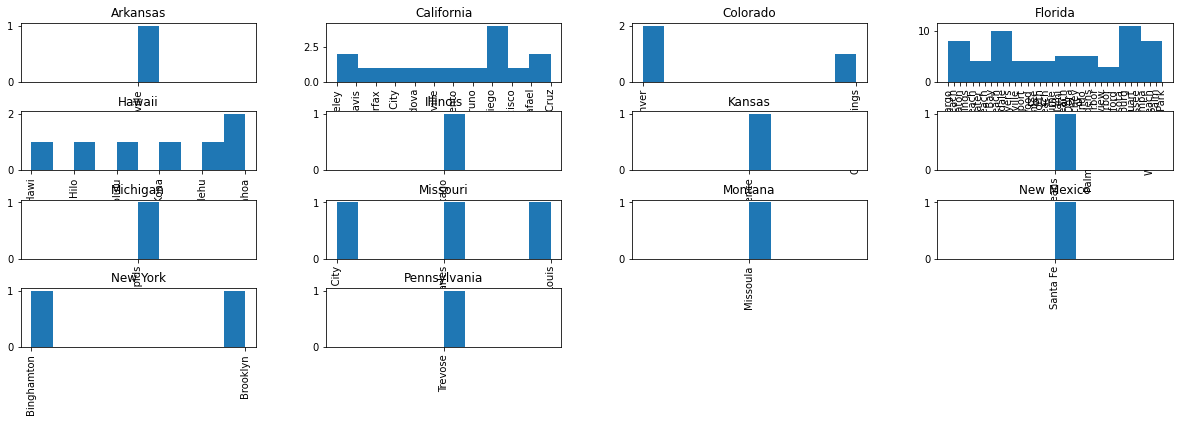

In [309]:
df.hist(column='City', by='State', figsize=(20, 6),)

In [310]:
df.groupby(['State']).count().sort_values(by='City', ascending=False)


,Name,City
State,,
Florida,62,62
California,15,15
Hawaii,7,7
Colorado,3,3
Missouri,3,3
New York,2,2
Arkansas,1,1
Illinois,1,1
Kansas,1,1


**We definitely should focus our investigation on Florida, where the most Kava bars are located.**

In [311]:
select_florida = df.loc[df['State'] == 'Florida']
print (select_florida)

                                Name    State             City
19       Dharma Hookah & Kava Lounge  Florida            Largo
20                 Kava By the Water  Florida    Pompano Beach
21                  The Nak Kava Bar  Florida       Boca Raton
22                            Nakava  Florida       Boca Raton
23             Kava Culture Kava Bar  Florida   Bonita Springs
..                               ...      ...              ...
76  Mad Chiller World Kava & Waffles  Florida            Tampa
77                           Te Mana  Florida  West Palm Beach
78      Purple Lotus West Palm Beach  Florida   West West Palm
79              The Healthy Buddah 2  Florida      Winter Park
80                  Kava Cove Lounge  Florida      Winter Park

[62 rows x 3 columns]


<AxesSubplot:title={'center':'Florida'}>

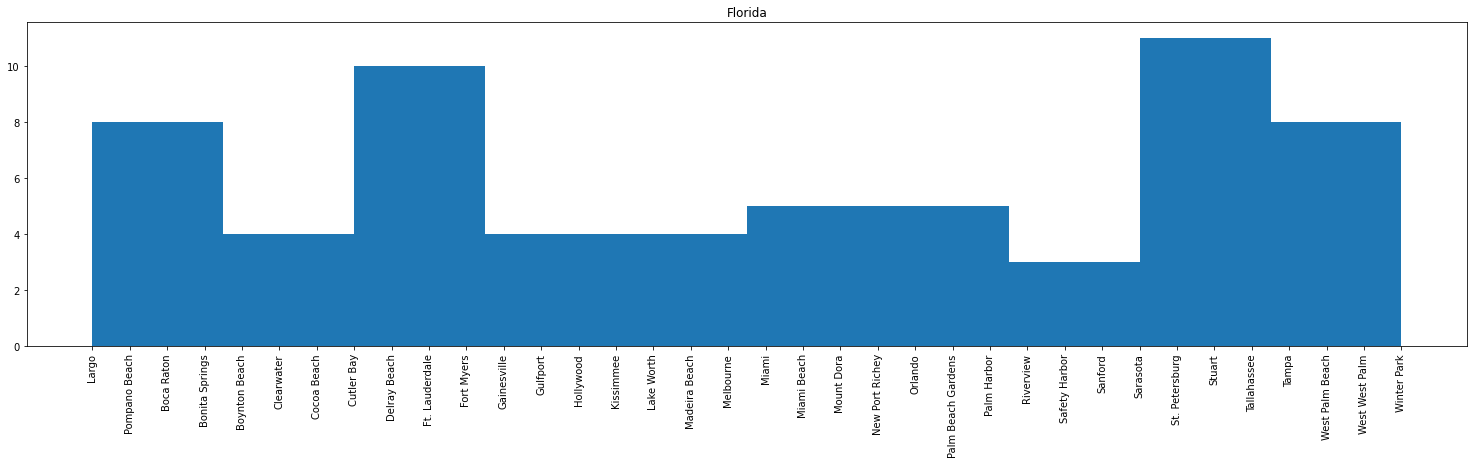

In [312]:
select_florida.hist(column='City', by='State', figsize=(25, 6),)

In [313]:
stuart = select_florida[select_florida['City'] =='Stuart']
stuart


,Name,State,City
71,Island Root Kava Bar,Florida,Stuart


In [314]:
talahasee= select_florida[select_florida['City'] =='Tallahassee']
talahasee

,Name,State,City
72,Kavakaze,Florida,Tallahassee


In [315]:
st_petersburg = select_florida[select_florida['City'] =='St. Petersburg']
st_petersburg

,Name,State,City
63,Mad Hatters Ethnobotanical Tea Bar,Florida,St. Petersburg
64,Vapor Road – Tyrone,Florida,St. Petersburg
65,Bula Kafe,Florida,St. Petersburg
66,Grassroots Kava House,Florida,St. Petersburg
67,Lava Lounge,Florida,St. Petersburg
68,Muddy Water Kava,Florida,St. Petersburg
69,InVision Creative Cafe,Florida,St. Petersburg
70,Vapor Road – Disston,Florida,St. Petersburg


In [316]:
tampa = select_florida[select_florida['City'] =='Tampa']
tampa

,Name,State,City
73,Steep Station,Florida,Tampa
74,SpookEasy Lounge,Florida,Tampa
75,Tampa Vapor – South Tampa,Florida,Tampa
76,Mad Chiller World Kava & Waffles,Florida,Tampa


**Because St. Petersburg and Tampa are very close, we should focus our analysis on those two areas.**

In [317]:
frames = [st_petersburg, tampa]
final_list = pd.concat(frames)
final_list

,Name,State,City
63,Mad Hatters Ethnobotanical Tea Bar,Florida,St. Petersburg
64,Vapor Road – Tyrone,Florida,St. Petersburg
65,Bula Kafe,Florida,St. Petersburg
66,Grassroots Kava House,Florida,St. Petersburg
67,Lava Lounge,Florida,St. Petersburg
68,Muddy Water Kava,Florida,St. Petersburg
69,InVision Creative Cafe,Florida,St. Petersburg
70,Vapor Road – Disston,Florida,St. Petersburg
73,Steep Station,Florida,Tampa
74,SpookEasy Lounge,Florida,Tampa


In [318]:
from geopy.geocoders import Nominatim

In [319]:
address = 'St. Petersburg, FL'

geolocator = Nominatim(user_agent="stpt_expoler")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of St. Petersburg are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of St. Petersburg are 27.7703796, -82.6695085.


In [320]:
CLIENT_ID = ''
CLIENT_SECRET = ''
ACCESS_TOKEN = ''
VERSION = '20180604'
LIMIT = 1
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)
print (latitude)
print (longitude)
radius = 10000

Your credentails:
CLIENT_ID: U15IH31SPJWMOVTCUXZ4EDSNQDLYBQJKQVJ13MLJXPGVLISQ
CLIENT_SECRET:NPRYGUQVHRM0TH5JA2DNLQS1YEOVUFHFHML4ZQUN0G54GZ4P
27.7703796
-82.6695085


#### Send the GET Request and examine the results

Initial effort was to automate this process, but since the results were not consistent, in particular not exactly finding the name, we are researching one by one. This will also allow time to review what was found and if any pertinent information is shown.

In [351]:
search_query1 = 'Mad Hatters Ethnobotanical Tea Bar'
print(search_query1 + ' .... OK!')

url1 = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, search_query1, radius, LIMIT)
results1 = requests.get(url1).json()

Mad Hatters Ethnobotanical Tea Bar .... OK!


In [322]:
id=results1['response']['venues'][0]['id']
lat=results1['response']['venues'][0]['location']['lat']
long=results1['response']['venues'][0]['location']['lng']
zip=results1['response']['venues'][0]['location']['postalCode']
address=results1['response']['venues'][0]['location']['formattedAddress']
name=results1['response']['venues'][0]['categories'][0]['name']
delivery_name=results1['response']['venues'][0]['delivery']['provider']['name']
delivery_url=results1['response']['venues'][0]['delivery']['url']
final_list.loc[63:,'venue_id']=id
final_list.loc[63:,'lat']=lat
final_list.loc[63:,'long']=long
final_list.loc[63:,'zip']=zip
final_list.loc[63:,'category_name']=name
final_list.loc[63:,'address']=json.dumps(address)
final_list.loc[63:,'delivery_provider']=delivery_name
final_list.loc[63:,'delivery_url']=delivery_url

In [323]:
search_query2 = 'Vapor Road – Tyrone'
print(search_query2 + ' .... OK!')
url2 = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, search_query2, radius, LIMIT)
results2 = requests.get(url2).json()

Vapor Road – Tyrone .... OK!


In [324]:
id=results2['response']['venues'][0]['id']
lat=results2['response']['venues'][0]['location']['lat']
long=results2['response']['venues'][0]['location']['lng']
zip=results2['response']['venues'][0]['location']['postalCode']
address=results2['response']['venues'][0]['location']['formattedAddress']
name=results2['response']['venues'][0]['categories'][0]['name']
delivery_name=results2['response']['venues'][0]['delivery']['provider']['name']
delivery_url=results2['response']['venues'][0]['delivery']['url']
final_list.loc[64:,'venue_id']=id
final_list.loc[64:,'lat']=lat
final_list.loc[64:,'long']=long
final_list.loc[64:,'zip']=zip
final_list.loc[64:,'address']=json.dumps(address)
final_list.loc[64:,'category_name']=name
final_list.loc[64:,'delivery_provider']=delivery_name
final_list.loc[64:,'delivery_url']=delivery_url

In [325]:
search_query3 = 'Bula Kafe'
print(search_query3 + ' .... OK!')
url3 = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, search_query3, radius, LIMIT)
results3 = requests.get(url3).json()

Bula Kafe .... OK!


In [326]:
id=results3['response']['venues'][0]['id']
lat=results3['response']['venues'][0]['location']['lat']
long=results3['response']['venues'][0]['location']['lng']
zip=results3['response']['venues'][0]['location']['postalCode']
address=results3['response']['venues'][0]['location']['formattedAddress']
name=results3['response']['venues'][0]['categories'][0]['name']
delivery_name=results3['response']['venues'][0]['delivery']['provider']['name']
delivery_url=results3['response']['venues'][0]['delivery']['url']
final_list.loc[65:,'venue_id']=id
final_list.loc[65:,'lat']=lat
final_list.loc[65:,'long']=long
final_list.loc[65:,'zip']=zip
final_list.loc[65:,'category_name']=name
final_list.loc[65:,'address']=json.dumps(address)
final_list.loc[65:,'delivery_provider']=delivery_name
final_list.loc[65:,'delivery_url']=delivery_url

In [327]:
search_query4 = 'Grassroots Kava House'
print(search_query4 + ' .... OK!')
url4 = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, search_query4, radius, LIMIT)
results4 = requests.get(url4).json()

Grassroots Kava House .... OK!


In [328]:
id=results4['response']['venues'][0]['id']
lat=results4['response']['venues'][0]['location']['lat']
long=results4['response']['venues'][0]['location']['lng']
zip=results4['response']['venues'][0]['location']['postalCode']
address=results4['response']['venues'][0]['location']['formattedAddress']
name=results4['response']['venues'][0]['categories'][0]['name']
delivery_name=results4['response']['venues'][0]['delivery']['provider']['name']
delivery_url=results4['response']['venues'][0]['delivery']['url']
final_list.loc[66:,'venue_id']=id
final_list.loc[66:,'lat']=lat
final_list.loc[66:,'long']=long
final_list.loc[66:,'zip']=zip
final_list.loc[66:,'category_name']=name
final_list.loc[66:,'address']=json.dumps(address)
final_list.loc[66:,'delivery_provider']=delivery_name
final_list.loc[66:,'delivery_url']=delivery_url

In [329]:
search_query5 = 'Lava Lounge'
print(search_query5 + ' .... OK!')
url5 = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, search_query5, radius, LIMIT)
results5 = requests.get(url5).json()

Lava Lounge .... OK!


In [330]:
id=results5['response']['venues'][0]['id']
lat=results5['response']['venues'][0]['location']['lat']
long=results5['response']['venues'][0]['location']['lng']
zip=results5['response']['venues'][0]['location']['postalCode']
address=results5['response']['venues'][0]['location']['formattedAddress']
name=results5['response']['venues'][0]['categories'][0]['name']
delivery_name=''
delivery_url=''
final_list.loc[67:,'venue_id']=id
final_list.loc[67:,'lat']=lat
final_list.loc[67:,'long']=long
final_list.loc[67:,'zip']=zip
final_list.loc[67:,'category_name']=name
final_list.loc[67:,'address']=json.dumps(address)
final_list.loc[67:,'delivery_provider']=delivery_name
final_list.loc[67:,'delivery_url']=delivery_url

In [331]:
search_query6 = 'Muddy Water Kava'
print(search_query6 + ' .... OK!')
url6 = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, search_query6, radius, LIMIT)
results6 = requests.get(url6).json()

Muddy Water Kava .... OK!


In [332]:
id=results6['response']['venues'][0]['id']
lat=results6['response']['venues'][0]['location']['lat']
long=results6['response']['venues'][0]['location']['lng']
zip=33703
address=results6['response']['venues'][0]['location']['formattedAddress']
name=results6['response']['venues'][0]['categories'][0]['name']
delivery_name=''
delivery_url=''
final_list.loc[68:,'venue_id']=id
final_list.loc[68:,'lat']=lat
final_list.loc[68:,'long']=long
final_list.loc[68:,'zip']=zip
final_list.loc[68:,'category_name']=name
final_list.loc[68:,'address']=json.dumps(address)
final_list.loc[68:,'delivery_provider']=delivery_name
final_list.loc[68:,'delivery_url']=delivery_url

In [333]:
search_query7 = 'InVision Creative Cafe'
print(search_query7 + ' .... OK!')
url7 = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, search_query7, radius, LIMIT)
results7 = requests.get(url7).json()

InVision Creative Cafe .... OK!


In [334]:
id=results7['response']['venues'][0]['id']
lat=results7['response']['venues'][0]['location']['lat']
long=results7['response']['venues'][0]['location']['lng']
zip=results7['response']['venues'][0]['location']['postalCode']
address=results7['response']['venues'][0]['location']['formattedAddress']
name=results7['response']['venues'][0]['categories'][0]['name']
delivery_name=results7['response']['venues'][0]['delivery']['provider']['name']
delivery_url=results7['response']['venues'][0]['delivery']['url']
final_list.loc[69:,'venue_id']=id
final_list.loc[69:,'lat']=lat
final_list.loc[69:,'long']=long
final_list.loc[69:,'zip']=zip
final_list.loc[69:,'category_name']=name
final_list.loc[69:,'address']=json.dumps(address)
final_list.loc[69:,'delivery_provider']=delivery_name
final_list.loc[69:,'delivery_url']=delivery_url

In [335]:
search_query8 = 'Vapor Road – Disston'
print(search_query8 + ' .... OK!')
url8 = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, search_query8, radius, LIMIT)
results8 = requests.get(url8).json()

Vapor Road – Disston .... OK!


In [336]:
id=results8['response']['venues'][0]['id']
lat=results8['response']['venues'][0]['location']['lat']
long=results8['response']['venues'][0]['location']['lng']
zip=results8['response']['venues'][0]['location']['postalCode']
address=results8['response']['venues'][0]['location']['formattedAddress']
name=results8['response']['venues'][0]['categories'][0]['name']
delivery_name=results8['response']['venues'][0]['delivery']['provider']['name']
delivery_url=results8['response']['venues'][0]['delivery']['url']
final_list.loc[70:,'venue_id']=id
final_list.loc[70:,'lat']=lat
final_list.loc[70:,'long']=long
final_list.loc[70:,'zip']=zip
final_list.loc[70:,'category_name']=name
final_list.loc[70:,'address']=json.dumps(address)
final_list.loc[70:,'delivery_provider']=delivery_name
final_list.loc[70:,'delivery_url']=delivery_url

Now we need to review Kava Bars in Tampa

In [337]:
search_query9 = 'Steep Station'
print(search_query9 + ' .... OK!')
LIMIT = 1
radius = 50000
url9 = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, search_query9, radius, LIMIT)
results9 = requests.get(url9).json()

Steep Station .... OK!


In [338]:
id=results9['response']['venues'][0]['id']
lat=results9['response']['venues'][0]['location']['lat']
long=results9['response']['venues'][0]['location']['lng']
zip=results9['response']['venues'][0]['location']['postalCode']
address=results9['response']['venues'][0]['location']['formattedAddress']
name=results9['response']['venues'][0]['categories'][0]['name']
delivery_name=results9['response']['venues'][0]['delivery']['provider']['name']
delivery_url=results9['response']['venues'][0]['delivery']['url']
final_list.loc[73:,'venue_id']=id
final_list.loc[73:,'lat']=lat
final_list.loc[73:,'long']=long
final_list.loc[73:,'zip']=zip
final_list.loc[73:,'category_name']=name
final_list.loc[73:,'address']=json.dumps(address)
final_list.loc[73:,'delivery_provider']=delivery_name
final_list.loc[73:,'delivery_url']=delivery_url

In [339]:
search_query10 = 'SpookEasy Lounge'
print(search_query10 + ' .... OK!')
url10 = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, search_query10, radius, LIMIT)
results10 = requests.get(url10).json()

SpookEasy Lounge .... OK!


In [340]:
id=results10['response']['venues'][0]['id']
lat=results10['response']['venues'][0]['location']['lat']
long=results10['response']['venues'][0]['location']['lng']
zip=results10['response']['venues'][0]['location']['postalCode']
address=results10['response']['venues'][0]['location']['formattedAddress']
name=results10['response']['venues'][0]['categories'][0]['name']
delivery_name=results10['response']['venues'][0]['delivery']['provider']['name']
delivery_url=results10['response']['venues'][0]['delivery']['url']
final_list.loc[74:,'venue_id']=id
final_list.loc[74:,'lat']=lat
final_list.loc[74:,'long']=long
final_list.loc[74:,'zip']=zip
final_list.loc[74:,'category_name']=name
final_list.loc[74:,'address']=json.dumps(address)
final_list.loc[74:,'delivery_provider']=delivery_name
final_list.loc[74:,'delivery_url']=delivery_url

In [341]:
search_query11 = 'Tampa Vapor'
print(search_query11 + ' .... OK!')
url11 = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, search_query11, radius, LIMIT)
results11 = requests.get(url11).json()

Tampa Vapor .... OK!


In [342]:
id=results11['response']['venues'][0]['id']
lat=results11['response']['venues'][0]['location']['lat']
long=results11['response']['venues'][0]['location']['lng']
zip=results11['response']['venues'][0]['location']['postalCode']
address=results11['response']['venues'][0]['location']['formattedAddress']
name=results11['response']['venues'][0]['categories'][0]['name']
delivery_name=''
delivery_url=''
final_list.loc[75:,'venue_id']=id
final_list.loc[75:,'lat']=lat
final_list.loc[75:,'long']=long
final_list.loc[75:,'zip']=zip
final_list.loc[75:,'category_name']=name
final_list.loc[75:,'address']=json.dumps(address)
final_list.loc[75:,'delivery_provider']=delivery_name
final_list.loc[75:,'delivery_url']=delivery_url

In [343]:
search_query15 = 'Mad Chiller World Kava & Waffles'
print(search_query15 + ' .... OK!')
url15 = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, search_query15, radius, LIMIT)
results15 = requests.get(url15).json()

Mad Chiller World Kava & Waffles .... OK!


In [344]:
id=results15['response']['venues'][0]['id']
lat=results15['response']['venues'][0]['location']['lat']
long=results15['response']['venues'][0]['location']['lng']
zip=results15['response']['venues'][0]['location']['postalCode']
address=results15['response']['venues'][0]['location']['formattedAddress']
name=results15['response']['venues'][0]['categories'][0]['name']
delivery_name=results15['response']['venues'][0]['delivery']['provider']['name']
delivery_url=results15['response']['venues'][0]['delivery']['url']
final_list.loc[76:,'venue_id']=id
final_list.loc[76:,'lat']=lat
final_list.loc[76:,'long']=long
final_list.loc[76:,'zip']=zip
final_list.loc[76:,'category_name']=name
final_list.loc[76:,'address']=json.dumps(address)
final_list.loc[76:,'delivery_provider']=delivery_name
final_list.loc[76:,'delivery_url']=delivery_url

Type of Business:

In [345]:
final_list['category_name'].unique()

array(['Tea Room', 'Vape Store', 'Café', 'Lounge', 'Smoke Shop'],
      dtype=object)

In [346]:
final_list.groupby('category_name').count()

,Name,State,City,venue_id,lat,long,zip,address,delivery_provider,delivery_url
category_name,,,,,,,,,,
Café,1,1,1,1,1,1,1,1,1,1
Lounge,1,1,1,1,1,1,1,1,1,1
Smoke Shop,1,1,1,1,1,1,1,1,1,1
Tea Room,7,7,7,7,7,7,7,7,7,7
Vape Store,2,2,2,2,2,2,2,2,2,2


In [347]:
final_list.groupby('zip').count()

,Name,State,City,venue_id,lat,long,category_name,address,delivery_provider,delivery_url
zip,,,,,,,,,,
33703,1,1,1,1,1,1,1,1,1,1
33605,1,1,1,1,1,1,1,1,1,1
33606,1,1,1,1,1,1,1,1,1,1
33618,1,1,1,1,1,1,1,1,1,1
33629,1,1,1,1,1,1,1,1,1,1
33705,2,2,2,2,2,2,2,2,2,2
33709,1,1,1,1,1,1,1,1,1,1
33710,2,2,2,2,2,2,2,2,2,2
33713,1,1,1,1,1,1,1,1,1,1


In [400]:
address = 'St. Petersburg, FL'

geolocator = Nominatim(user_agent="stpt_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of St. Petersburg are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of St. Petersburg are 27.7703796, -82.6695085.


In [401]:
# create map of New York using latitude and longitude values
map_stpt = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for i in range(0,len(final_list)):
   folium.Marker(
      location=[final_list.iloc[i]['lat'], final_list.iloc[i]['long']],
      popup=final_list.iloc[i]['Name'],
   ).add_to(map_stpt)
map_stpt

Zip code of interest: 33705 and 33710. Since 33710 are all Vapor Houses, we will focus only on 33705.

In [402]:
zip_focus = final_list.loc[final_list['zip'] == '33705']

In [403]:
zip_focus

,Name,State,City,venue_id,lat,long,zip,category_name,address,delivery_provider,delivery_url
66,Grassroots Kava House,Florida,St. Petersburg,587056b445c3ed09988fa406,27.771349,-82.648091,33705,Tea Room,"[""957 Central Ave"", ""Saint Petersburg, FL 33705""]",grubhub,https://www.grubhub.com/restaurant/grassroots-...
69,InVision Creative Cafe,Florida,St. Petersburg,580a9764d67cd5bd3773a7a2,27.775320,-82.654860,33705,Café,"[""275 16th St N"", ""Saint Petersburg, FL 33705""]",grubhub,https://www.grubhub.com/restaurant/invision-cr...


In [429]:
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, CLIENT_SECRET, VERSION, 
            27.771349, -82.648091, 500, 100)

results = requests.get(url).json()["response"]['groups'][0]['items']
venues_list.append([(
            'Grassroots Kava House',27.771349, -82.648091,
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
nearby_venues.columns = ['Name',
                  'Latitude',
                  'Longitude',
                  'Venue',
                  'Venue Latitude',
                  'Venue Longitude',
                  'Venue Category']

In [430]:
nearby_venues

,Name,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Grassroots Kava House,27.771349,-82.648091,Engine No. 9,27.771828,-82.646852,Burger Joint
1,Grassroots Kava House,27.771349,-82.648091,Red Mesa Mercado,27.771514,-82.649979,Mexican Restaurant
2,Grassroots Kava House,27.771349,-82.648091,Bavaro's Pizza Napoletana & Pastaria,27.771301,-82.647873,Italian Restaurant
3,Grassroots Kava House,27.771349,-82.648091,Dr. BBQ,27.770571,-82.650012,BBQ Joint
4,Grassroots Kava House,27.771349,-82.648091,Bodega,27.771071,-82.650546,Latin American Restaurant
...,...,...,...,...,...,...,...
61,Grassroots Kava House,27.771349,-82.648091,Urban Style Flats Pool,27.767848,-82.646816,Pool
62,Grassroots Kava House,27.771349,-82.648091,City Nails II,27.768096,-82.646158,Cosmetics Shop
63,Grassroots Kava House,27.771349,-82.648091,Webbs Plaza,27.767830,-82.646779,Shop & Service
64,Grassroots Kava House,27.771349,-82.648091,Team TB Store,27.770188,-82.652630,Sporting Goods Shop


In [431]:
print('There are {} uniques categories.'.format(len(nearby_venues['Venue Category'].unique())))

There are 49 uniques categories.


In [444]:
group1 =nearby_venues.groupby('Venue Category').count()

In [450]:
group1.sort_values(by='Venue',ascending=False).head()

,Name,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude
Venue Category,,,,,,
Art Gallery,4,4,4,4,4,4
Bar,4,4,4,4,4,4
Brewery,3,3,3,3,3,3
Coffee Shop,3,3,3,3,3,3
Yoga Studio,2,2,2,2,2,2
